In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження датасету
data = pd.read_csv('museum_visitors.csv')

# Виведення перших 5 рядків
print(data.head())

# Попередній аналіз даних
print("Розмір датасету:", data.shape)
print("Типи даних:")
print(data.dtypes)
print("Кількість пропусків:")
print(data.isnull().sum())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  
Розмір датасету: (59, 5)
Типи даних:
Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object
Кількість пропусків:
Da

In [3]:
# Перевірка наявності дублікатів та видалення їх
data.drop_duplicates(inplace=True)
print("Розмір таблиці без дублікатів:", data.shape)

# Визначення років у датасеті
data['Date'] = pd.to_datetime(data['Date'])
years = data['Date'].dt.year.unique()
print("Роки в датасеті:", years)

# Зміна назв стовпців
data.columns = ['Date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

Розмір таблиці без дублікатів: (59, 5)
Роки в датасеті: [2014 2015 2016 2017 2018]


In [4]:
# Обчислення середньої кількості відвідувачів для кожного музею
avg_visitors = data.mean()
print("Середня кількість відвідувачів:")
print(avg_visitors)

# Знайдемо мінімальну та максимальну кількість відвідувачів для кожного музею у 2018 році
min_max_2018 = data[data['Date'].dt.year == 2018][['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].agg(['min', 'max'])
print("Мінімум та максимум відвідувачів у 2018 році:")
print(min_max_2018)

Середня кількість відвідувачів:
Date                                    2016-05-31 20:20:20.338983168
avila_adobe                                              24061.661017
firehouse_museum                                          6472.830508
chinese_american_museum                                   2721.254237
america_tropical_interpretive_center                      7107.016949
dtype: object
Мінімум та максимум відвідувачів у 2018 році:
     avila_adobe  firehouse_museum  chinese_american_museum  \
min        14718              3306                     2146   
max        25173              8013                     4960   

     america_tropical_interpretive_center  
min                                  3180  
max                                  5837  


In [55]:
data['Date'] = pd.to_datetime(data['Date'])

# Знаходження місяців з найвищою і найнижчою загальною кількістю відвідувачів для 2015 року та виведення назв місяців:
monthly_visitors_2015 = data[data['Date'].dt.year == 2015]
monthly_totals = monthly_visitors_2015[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].sum()

max = 0
max_month = '0'
min = 10
min_month = '0'

for index, row in monthly_visitors_2015.iterrows():
    avila_adobe = row['avila_adobe']
    firehouse_museum = row['firehouse_museum']
    chinese_american_museum = row['chinese_american_museum']
    america_tropical_interpretive_center = row['america_tropical_interpretive_center']
    sum = avila_adobe + firehouse_museum + chinese_american_museum + america_tropical_interpretive_center

    if(index == 12):
        max = sum
        min = sum
    
    if(sum > max):
        max = sum
        max_month = row['Date']
        
    if(sum < min):
        min = sum
        min_month = row['Date']

print("Місяць з найбільшою кількістю відвідувачів у 2015 році:", pd.to_datetime(max_month).month)
print("Місяць з найменшою кількістю відвідувачів у 2015 році:", pd.to_datetime(min_month).month)

summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

summer_visitors = data[(data['Date'].dt.year == 2018) & (data['Date'].dt.month.isin(summer_months))]['avila_adobe'].sum()
winter_visitors = data[(data['Date'].dt.year == 2018) & (data['Date'].dt.month.isin(winter_months))]['avila_adobe'].sum()

print("Кількість відвідувачів музею Авіла Адобі влітку 2018 року:", summer_visitors)
print("Кількість відвідувачів музею Авіла Адобі взимку 2018 року:", winter_visitors)

Month with the highest total visitors in 2015: 5
Month with the lowest total visitors in 2015: 2
Number of visitors to the Avila Adobe museum in summer 2018: 66122
Number of visitors to the Avila Adobe museum in winter 2018: 30983


In [56]:
# Знайдемо кореляцію між кількістю відвідувачів в кожному з музеїв та датами у 2016 році
correlation_2016 = data[data['Date'].dt.year == 2016][['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].corr()
print("Кореляція між кількістю відвідувачів та датами у 2016 році:")
print(correlation_2016)

Кореляція між кількістю відвідувачів та датами у 2016 році:
                                      avila_adobe  firehouse_museum  \
avila_adobe                              1.000000          0.737200   
firehouse_museum                         0.737200          1.000000   
chinese_american_museum                  0.089054          0.553935   
america_tropical_interpretive_center     0.436561          0.247389   

                                      chinese_american_museum  \
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
avila_adobe                                                       0.436561  
firehouse_museum                                                  0.247389  
chinese_american_museum    

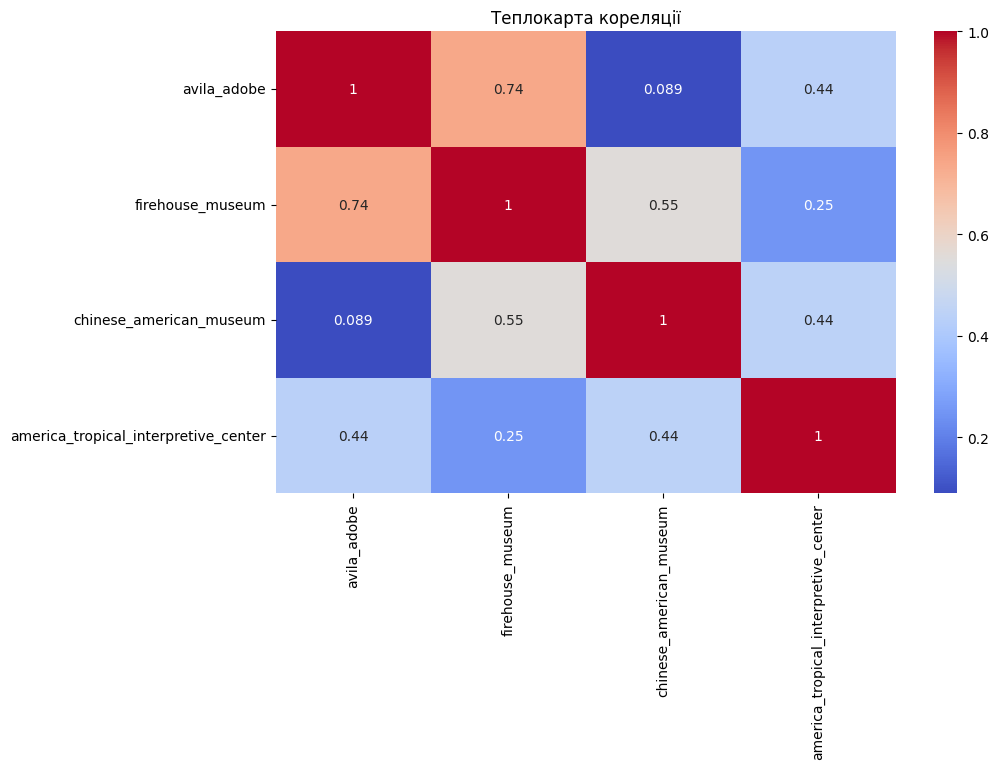

In [57]:
# Візуалізація даних

# Теплокарта кореляції
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_2016, annot=True, cmap='coolwarm')
plt.title("Теплокарта кореляції")
plt.show()

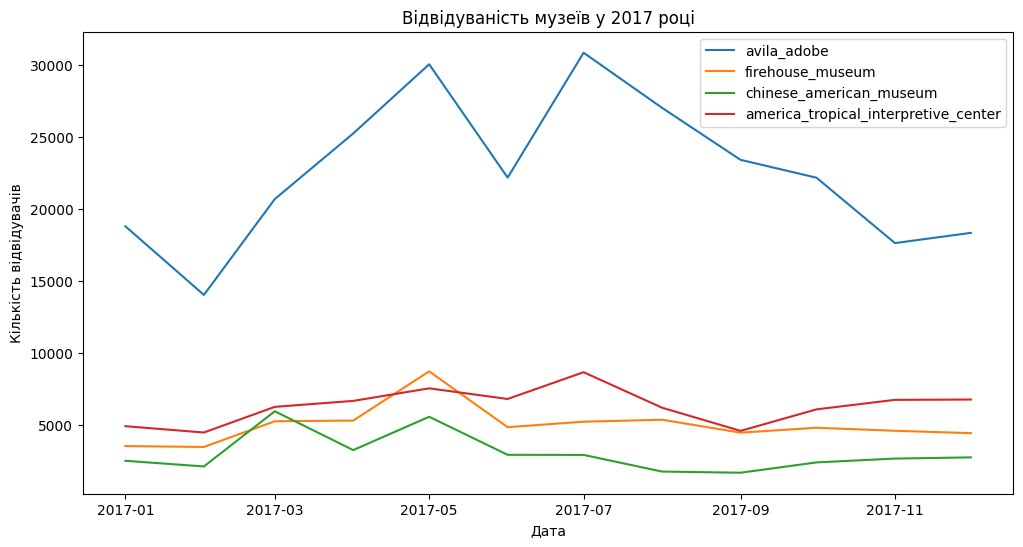

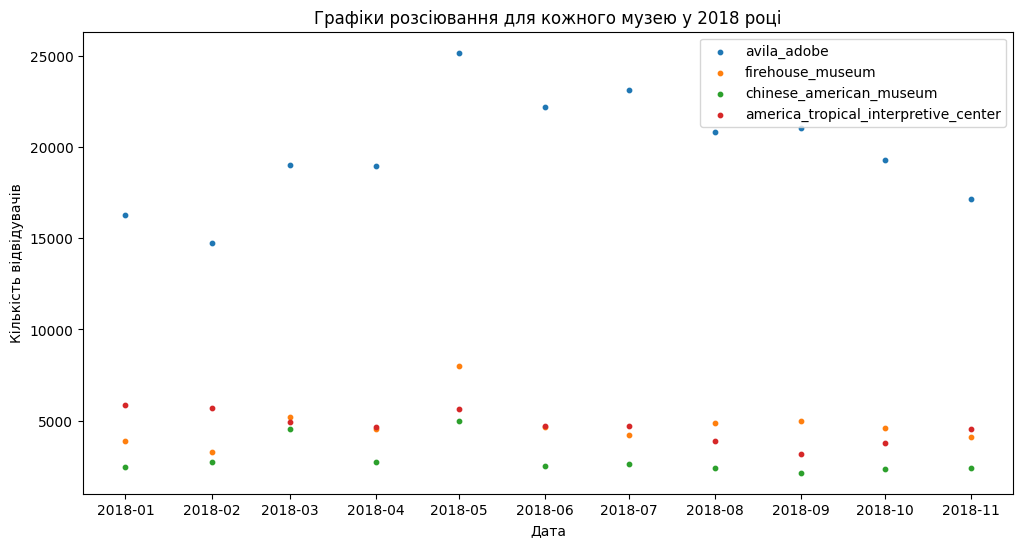

In [58]:
# Графік ліній для кожного музею у 2017 році
data_2017 = data[data['Date'].dt.year == 2017]
plt.figure(figsize=(12, 6))
for museum in data.columns[1:]:
    plt.plot(data_2017['Date'], data_2017[museum], label=museum)
plt.title("Відвідуваність музеїв у 2017 році")
plt.xlabel("Дата")
plt.ylabel("Кількість відвідувачів")
plt.legend()
plt.show()

# Графіки розсіювання для кожного музею за 2018 рік
data_2018 = data[data['Date'].dt.year == 2018]
plt.figure(figsize=(12, 6))
for museum in data.columns[1:]:
    plt.scatter(data_2018['Date'], data_2018[museum], label=museum, s=10)
plt.title("Графіки розсіювання для кожного музею у 2018 році")
plt.xlabel("Дата")
plt.ylabel("Кількість відвідувачів")
plt.legend()
plt.show()

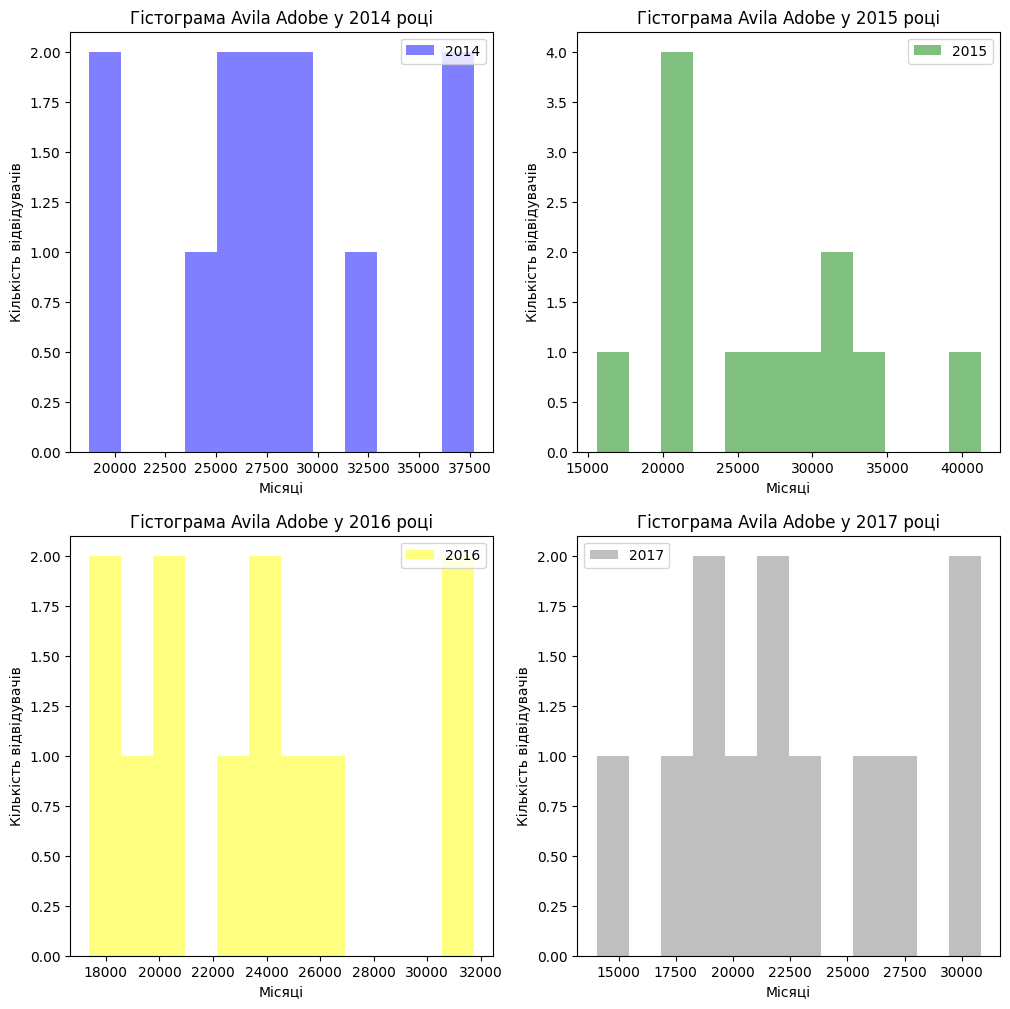

In [59]:
# Гістограма відвідуваності за місяцями для кожного музею (2014-2017 роки)
years = [2014, 2015, 2016, 2017]
colors = ['blue', 'green', 'yellow', 'grey']

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
for i, year in enumerate(years):
    data_year = data[data['Date'].dt.year == year]
    axs[i // 2, i % 2].hist(data_year['avila_adobe'], bins=12, alpha=0.5, color=colors[i], label=str(year))
    axs[i // 2, i % 2].set_title(f"Гістограма Avila Adobe у {year} році")
    axs[i // 2, i % 2].set_xlabel("Місяці")
    axs[i // 2, i % 2].set_ylabel("Кількість відвідувачів")
    axs[i // 2, i % 2].legend()
plt.show()

Висновки:
Я навчився:

завантажувати датасети з файлів та імпортувати їх в середовище Python з використанням бібліотеки pandas.

проводити попередній аналіз даних, включаючи визначення розміру датасету, типів даних та виявлення пропусків.

робити перевірку наявності дублікатів у даних та їх видалення.

змінювати назви стовпців та форматування їх для зручності роботи.

обчислювати середні, мінімальні та максимальні значення для конкретних стовпців у вашому датасеті.

побудувати різних видів графіків та візуалізацію результатів аналізу даних, таких як теплокарти, графіки ліній та гістограми.